Dataset Loaded Successfully!
   age         job  marital  education  balance housing loan    contact  \
0   34       admin  married  secondary     1200     yes   no   cellular   
1   49  technician   single   tertiary      560      no   no  telephone   
2   28    services   single  secondary      300     yes  yes   cellular   
3   42  management  married   tertiary     1800     yes   no   cellular   
4   57     retired  married    primary     2500      no   no  telephone   

   duration  campaign  previous poutcome    y  
0       120         2         0  unknown   no  
1       300         1         1  success  yes  
2       180         3         0  unknown   no  
3       240         1         3  success  yes  
4        60         1         2  failure   no  

After Encoding:
   age  job  marital  education  balance  housing  loan  contact  duration  \
0   34    0        0          1     1200        1     0        0       120   
1   49    5        1          2      560        0     0    

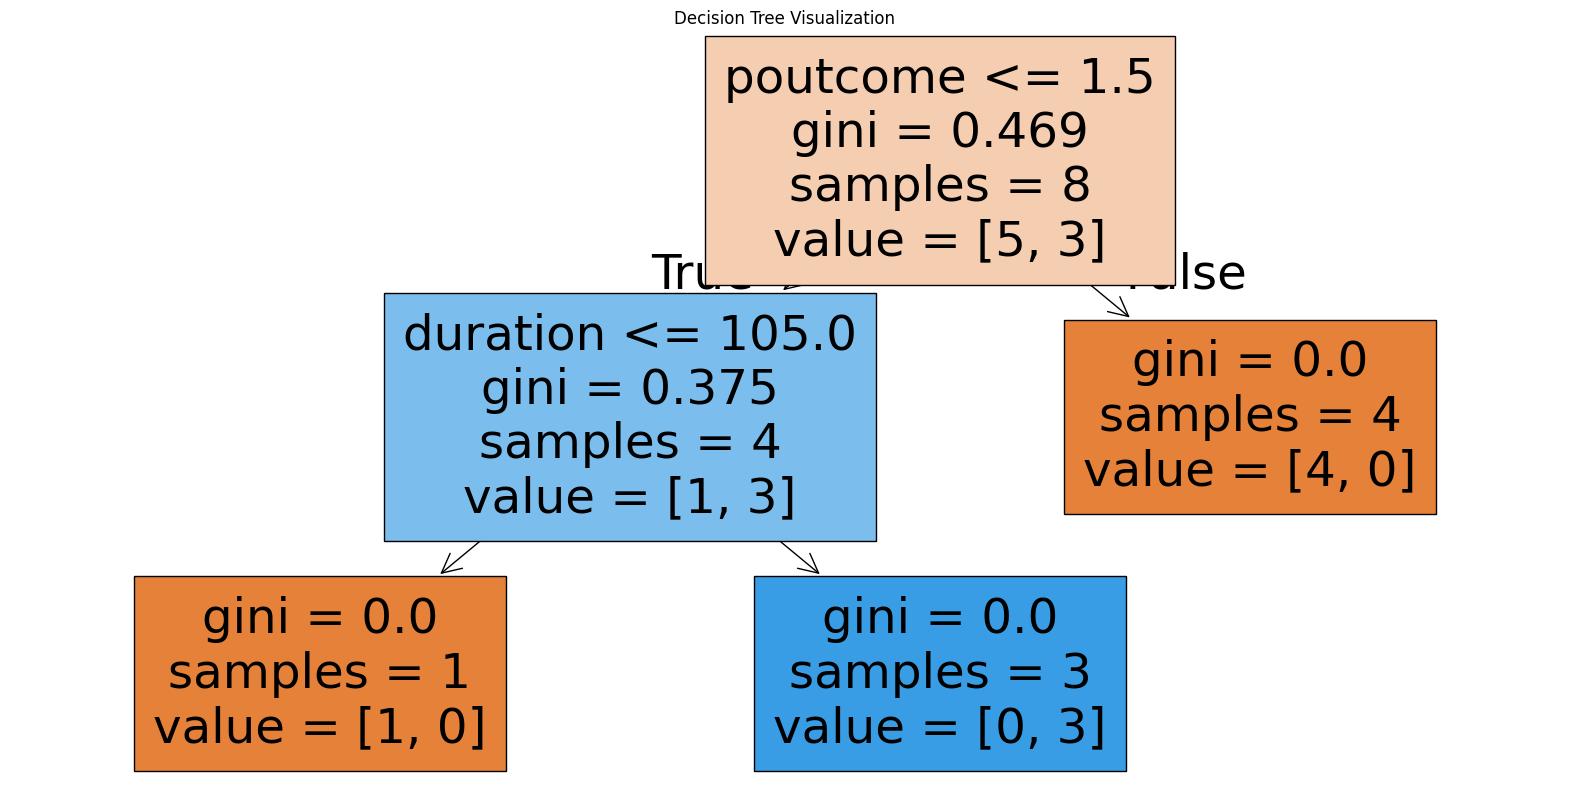

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

df = pd.read_csv("data/bank_marketing.csv")

print("Dataset Loaded Successfully!")
print(df.head())

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

print("\nAfter Encoding:")
print(df.head())

X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

print("\nAccuracy:", accuracy_score(Y_test, predictions))
print("\nClassification Report:\n", classification_report(Y_test, predictions))

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()
